In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [0]:
justdial = pd.read_csv("JustDial.csv",index_col="DateTime")

In [0]:
justdial.head()

,open,high,low,close,volume,close_sma,bb,rsi
DateTime,,,,,,,,
2015-02-02 09:15:00+05:30,1555.10,1564.70,1555.10,1564.70,821,0.997506,0.009393,33.333333
2015-02-02 09:16:00+05:30,1564.70,1564.70,1556.60,1563.25,324,0.997506,0.009393,33.333333
2015-02-02 09:17:00+05:30,1563.25,1563.25,1557.45,1560.00,245,0.997506,0.009393,33.333333
2015-02-02 09:18:00+05:30,1556.65,1559.00,1556.20,1558.70,221,0.997506,0.009393,33.333333
2015-02-02 09:19:00+05:30,1558.70,1559.00,1557.50,1557.50,80,0.997506,0.009393,33.333333


In [0]:
justdial["close1"] = 0
justdial["close2"] = 0
justdial["close3"] = 0
justdial["close4"] = 0
justdial["close5"] = 0
justdial["close6"] = 0
justdial["close7"] = 0 
justdial["close8"] = 0
justdial["close9"] = 0

In [0]:
justdial.drop(["high","low","close_sma","rsi"],axis=1,inplace=True)

In [0]:
justdial

,open,close,volume,bb,close1,close2,close3,close4,close5,close6,...,bb1,bb2,bb3,bb4,bb5,bb6,bb7,bb8,bb9,bb10
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-02-02 09:15:00+05:30,1555.10,1564.70,821,0.009393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-02 09:16:00+05:30,1564.70,1563.25,324,0.009393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-02 09:17:00+05:30,1563.25,1560.00,245,0.009393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-02 09:18:00+05:30,1556.65,1558.70,221,0.009393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2015-02-02 09:19:00+05:30,1558.70,1557.50,80,0.009393,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
justdial["close"].shift(1).head()

DateTime
2015-02-02 09:15:00+05:30        NaN
2015-02-02 09:16:00+05:30    1564.70
2015-02-02 09:17:00+05:30    1563.25
2015-02-02 09:18:00+05:30    1560.00
2015-02-02 09:19:00+05:30    1558.70
Name: close, dtype: float64

In [0]:
justdial["close1"] = justdial["close"].shift(1)
justdial["close2"] = justdial["close"].shift(2)
justdial["close3"] = justdial["close"].shift(3)
justdial["close4"] = justdial["close"].shift(4)
justdial["close5"] = justdial["close"].shift(5)
justdial["close6"] = justdial["close"].shift(6)
justdial["close7"] = justdial["close"].shift(7)
justdial["close8"] = justdial["close"].shift(8)
justdial["close9"] = justdial["close"].shift(9)
justdial["close10"] = justdial["close"].shift(10)
justdial["volume1"] = justdial["volume"].shift(1)
justdial["volume2"] = justdial["volume"].shift(2)
justdial["volume3"] = justdial["volume"].shift(3)
justdial["volume4"] = justdial["volume"].shift(4)
justdial["volume5"] = justdial["volume"].shift(5)
justdial["volume6"] = justdial["volume"].shift(6)
justdial["volume7"] = justdial["volume"].shift(7)
justdial["volume8"] = justdial["volume"].shift(8)
justdial["volume9"] = justdial["volume"].shift(9)
justdial["volume10"] = justdial["volume"].shift(10)
justdial["bb1"] = justdial["bb"].shift(1)
justdial["bb2"] = justdial["volume"].shift(2)
justdial["bb3"] = justdial["volume"].shift(3)
justdial["bb4"] = justdial["volume"].shift(4)
justdial["bb5"] = justdial["volume"].shift(5)
justdial["bb6"] = justdial["volume"].shift(6)
justdial["bb7"] = justdial["volume"].shift(7)
justdial["bb8"] = justdial["volume"].shift(8)
justdial["bb9"] = justdial["volume"].shift(9)
justdial["bb10"] = justdial["volume"].shift(10)

In [0]:
justdial["next_close"] = justdial["close"].shift(-1)

In [0]:
justdial.head()

,open,close,volume,bb,close1,close2,close3,close4,close5,close6,...,bb2,bb3,bb4,bb5,bb6,bb7,bb8,bb9,bb10,next_close
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-02-02 09:15:00+05:30,1555.10,1564.70,821,0.009393,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1563.25
2015-02-02 09:16:00+05:30,1564.70,1563.25,324,0.009393,1564.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1560.00
2015-02-02 09:17:00+05:30,1563.25,1560.00,245,0.009393,1563.25,1564.70,NaN,NaN,NaN,NaN,...,821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1558.70
2015-02-02 09:18:00+05:30,1556.65,1558.70,221,0.009393,1560.00,1563.25,1564.70,NaN,NaN,NaN,...,324.0,821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1557.50
2015-02-02 09:19:00+05:30,1558.70,1557.50,80,0.009393,1558.70,1560.00,1563.25,1564.7,NaN,NaN,...,245.0,324.0,821.0,NaN,NaN,NaN,NaN,NaN,NaN,1562.70


In [0]:
justdial = justdial[10:]

In [0]:
justdial.head()

,open,close,volume,bb,close1,close2,close3,close4,close5,close6,...,bb2,bb3,bb4,bb5,bb6,bb7,bb8,bb9,bb10,next_close
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-02-02 09:25:00+05:30,1551.85,1554.65,156,0.009393,1551.85,1560.00,1559.20,1558.80,1562.70,1557.5,...,137.0,240.0,693.0,1050.0,80.0,221.0,245.0,324.0,821.0,1554.70
2015-02-02 09:26:00+05:30,1554.65,1554.70,623,0.009393,1554.65,1551.85,1560.00,1559.20,1558.80,1562.7,...,954.0,137.0,240.0,693.0,1050.0,80.0,221.0,245.0,324.0,1554.90
2015-02-02 09:27:00+05:30,1554.70,1554.90,220,0.009393,1554.70,1554.65,1551.85,1560.00,1559.20,1558.8,...,156.0,954.0,137.0,240.0,693.0,1050.0,80.0,221.0,245.0,1554.35
2015-02-02 09:28:00+05:30,1554.90,1554.35,282,0.009393,1554.90,1554.70,1554.65,1551.85,1560.00,1559.2,...,623.0,156.0,954.0,137.0,240.0,693.0,1050.0,80.0,221.0,1554.80
2015-02-02 09:29:00+05:30,1553.00,1554.80,361,0.008419,1554.35,1554.90,1554.70,1554.65,1551.85,1560.0,...,220.0,623.0,156.0,954.0,137.0,240.0,693.0,1050.0,80.0,1553.25


In [0]:
js = justdial.copy()

In [0]:
js = js[:-1]

In [0]:
js.info()

<class 'pandas.core.frame.DataFrame'>
Index: 425943 entries, 2015-02-02 09:25:00+05:30 to 2019-09-13 15:28:00+05:30
Data columns (total 35 columns):
open          425943 non-null float64
close         425943 non-null float64
volume        425943 non-null int64
bb            425943 non-null float64
close1        425943 non-null float64
close2        425943 non-null float64
close3        425943 non-null float64
close4        425943 non-null float64
close5        425943 non-null float64
close6        425943 non-null float64
close7        425943 non-null float64
close8        425943 non-null float64
close9        425943 non-null float64
close10       425943 non-null float64
volume1       425943 non-null float64
volume2       425943 non-null float64
volume3       425943 non-null float64
volume4       425943 non-null float64
volume5       425943 non-null float64
volume6       425943 non-null float64
volume7       425943 non-null float64
volume8       425943 non-null float64
volume9       425

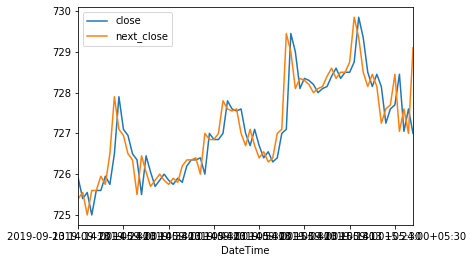

In [0]:
js[["close","next_close"]][-75:].plot()

In [0]:
js.to_csv("svm_data.csv")

In [0]:
js.head()

,open,close,volume,bb,close1,close2,close3,close4,close5,close6,...,bb2,bb3,bb4,bb5,bb6,bb7,bb8,bb9,bb10,next_close
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-02-02 09:25:00+05:30,1551.85,1554.65,156,0.009393,1551.85,1560.00,1559.20,1558.80,1562.70,1557.5,...,137.0,240.0,693.0,1050.0,80.0,221.0,245.0,324.0,821.0,1554.70
2015-02-02 09:26:00+05:30,1554.65,1554.70,623,0.009393,1554.65,1551.85,1560.00,1559.20,1558.80,1562.7,...,954.0,137.0,240.0,693.0,1050.0,80.0,221.0,245.0,324.0,1554.90
2015-02-02 09:27:00+05:30,1554.70,1554.90,220,0.009393,1554.70,1554.65,1551.85,1560.00,1559.20,1558.8,...,156.0,954.0,137.0,240.0,693.0,1050.0,80.0,221.0,245.0,1554.35
2015-02-02 09:28:00+05:30,1554.90,1554.35,282,0.009393,1554.90,1554.70,1554.65,1551.85,1560.00,1559.2,...,623.0,156.0,954.0,137.0,240.0,693.0,1050.0,80.0,221.0,1554.80
2015-02-02 09:29:00+05:30,1553.00,1554.80,361,0.008419,1554.35,1554.90,1554.70,1554.65,1551.85,1560.0,...,220.0,623.0,156.0,954.0,137.0,240.0,693.0,1050.0,80.0,1553.25


In [0]:
X = js.drop("next_close",axis=1)
y = js["next_close"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scalerX = StandardScaler().fit(X_train)

In [0]:
X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)

In [0]:
y_train = y_train.values.reshape(y_train.shape[0],1)

In [0]:
y_test = y_test.values.reshape(y_test.shape[0],1)

In [0]:
scalerY = StandardScaler().fit(y_train)

In [0]:
y_train_scaled = scalerY.transform(y_train)
y_test_scaled = scalerY.transform(y_test)

In [0]:
from sklearn.svm import LinearSVR

In [0]:
svr = LinearSVR()
svr.fit(X_test,y_test)

F:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
svr.score(X_test,y_test)

0.9998957966433188

In [0]:
svr.score(X_train,y_train)

0.999892838933829

In [0]:
X_train["close"][-1]


1023.35

In [0]:
y_train[-1]

array([1023.])

In [0]:
y_pred = svr.predict(X_test_scaled[0].reshape(1,-1))
y_pred


array([-0.04937049])

In [0]:
y_pred = scalerY.inverse_transform(y_pred)
y_pred

array([628.81627602])

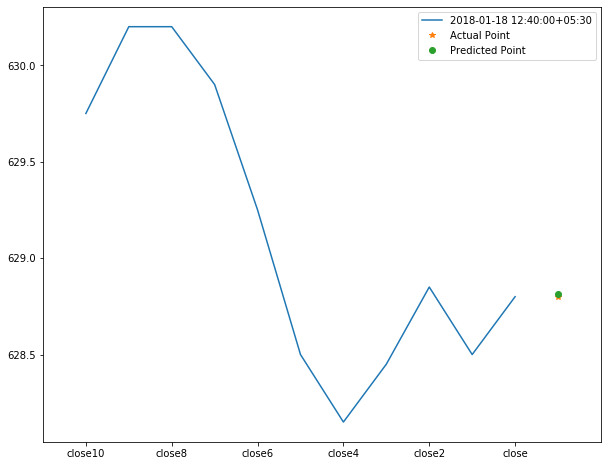

In [0]:
X_test.iloc[0][["close10","close9","close8","close7","close6","close5","close4","close3","close2","close1","close"]].plot(figsize=(10,8))
plt.plot(11,y_test[0],"*",label="Actual Point")
plt.plot(11,y_pred,"o",label="Predicted Point")
plt.xlim(-1,12)
plt.legend()

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA()

In [0]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

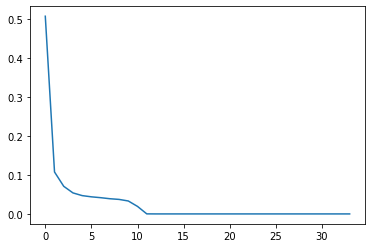

In [0]:
plt.plot(pca.explained_variance_ratio_)

In [0]:
y_test_pred = svr.predict(X_test_scaled)

In [0]:
y_test_pred = scalerY.inverse_transform(y_test_pred)

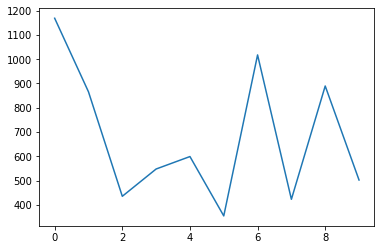

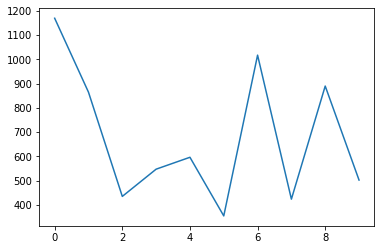

In [0]:
plt.plot(y_test[-10:])
plt.figure()
plt.plot(y_test_pred[-10:])